# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    """
    Build your own model
    """
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model    

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [1e-3,1e-4]
EPOCHS = 50


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
def get_optimizer(optimizer_name):
    OPTIMIZERS = {"SGD":keras.optimizers.SGD(lr=lr),
                  "RMSprop":keras.optimizers.RMSprop(lr=lr),
                  "AdaGrad":keras.optimizers.Adagrad(lr=lr),
                  "Adam":keras.optimizers.Adam(lr=lr)}
    return OPTIMIZERS.get(optimizer_name)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
for lr in LEARNING_RATE:
    optimizer_names = ["SGD","RMSprop","AdaGrad","Adam"]
    for optimizer_name in optimizer_names:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %f , optimizer=%s" % (lr,optimizer_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr)
        optimizer = get_optimizer(optimizer_name)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "lr: %f optimizer: %s" % (lr,optimizer_name)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.001000 , optimizer=SGD
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions f

50000/50000 [==============================] - 8s 150us/step - loss: 1.6925 - acc: 0.4120 - val_loss: 1.6960 - val_acc: 0.4152
Epoch 49/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6889 - acc: 0.4139 - val_loss: 1.6964 - val_acc: 0.4104
Epoch 50/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6855 - acc: 0.4147 - val_loss: 1.6904 - val_acc: 0.4165
Experiment with lr = 0.001000 , optimizer=RMSprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

50000/50000 [==============================] - 9s 176us/step - loss: 0.7753 - acc: 0.7193 - val_loss: 2.3398 - val_acc: 0.4555
Epoch 50/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.7678 - acc: 0.7256 - val_loss: 1.8847 - val_acc: 0.4987
Experiment with lr = 0.001000 , optimizer=AdaGrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)          

50000/50000 [==============================] - 8s 163us/step - loss: 1.2506 - acc: 0.5673 - val_loss: 1.3759 - val_acc: 0.5128
Experiment with lr = 0.001000 , optimizer=Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________

Experiment with lr = 0.000100 , optimizer=SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.9678 - acc: 0.2926 - val_loss: 1.8444 - val_acc: 0.3393
Epoch 2/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.7923 - acc: 0.3647 - val_loss: 1.7921 - val_acc: 0.3419
Epoch 3/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.7106 - acc: 0.3951 - val_loss: 1.7176 - val_acc: 0.3809
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6583 - acc: 0.4146 - val_loss: 1.7955 - val_acc: 0.3505
Epoch 5/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6137 - acc: 0.4290 - val_loss: 1.6383 - val_acc: 0.4203
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.5753 - acc: 0.4433 - val_loss: 1.7143 - val_acc: 0.3876
Epoch 7/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5464 - acc: 0.4532 - val_loss: 1.6034 - 

Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.9339 - acc: 0.3318 - val_loss: 1.9144 - val_acc: 0.3356
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8917 - acc: 0.3450 - val_loss: 1.8849 - val_acc: 0.3458
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8651 - acc: 0.3547 - val_loss: 1.8618 - val_acc: 0.3516
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8463 - acc: 0.3607 - val_loss: 1.8462 - val_acc: 0.3575
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8314 - acc: 0.3671 - val_loss: 1.8317 - val_acc: 0.3637
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8186 - acc: 0.3713 - val_loss: 1.8189 - val_acc: 0.3681
Epoch 8/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8076 - acc: 0.3753 - val_loss: 1.8092 - val_acc: 0.3736
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 10s 190us/step - loss: 1.1921 - acc: 0.5825 - val_loss: 1.3590 - val_acc: 0.5154
Epoch 21/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1766 - acc: 0.5890 - val_loss: 1.3536 - val_acc: 0.5223
Epoch 22/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.1680 - acc: 0.5926 - val_loss: 1.3364 - val_acc: 0.5266
Epoch 23/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.1454 - acc: 0.6022 - val_loss: 1.3183 - val_acc: 0.5332
Epoch 24/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.1394 - acc: 0.6024 - val_loss: 1.3186 - val_acc: 0.5348
Epoch 25/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.1244 - acc: 0.6073 - val_loss: 1.3148 - val_acc: 0.5357
Epoch 26/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1104 - acc: 0.6139 - val_loss: 1.3338 - val_acc: 0.5292
Epoch 27/50
50000/50000 [=========

In [9]:
import pickle
f = open('results.bak', 'wb')
pickle.dump(results, f)

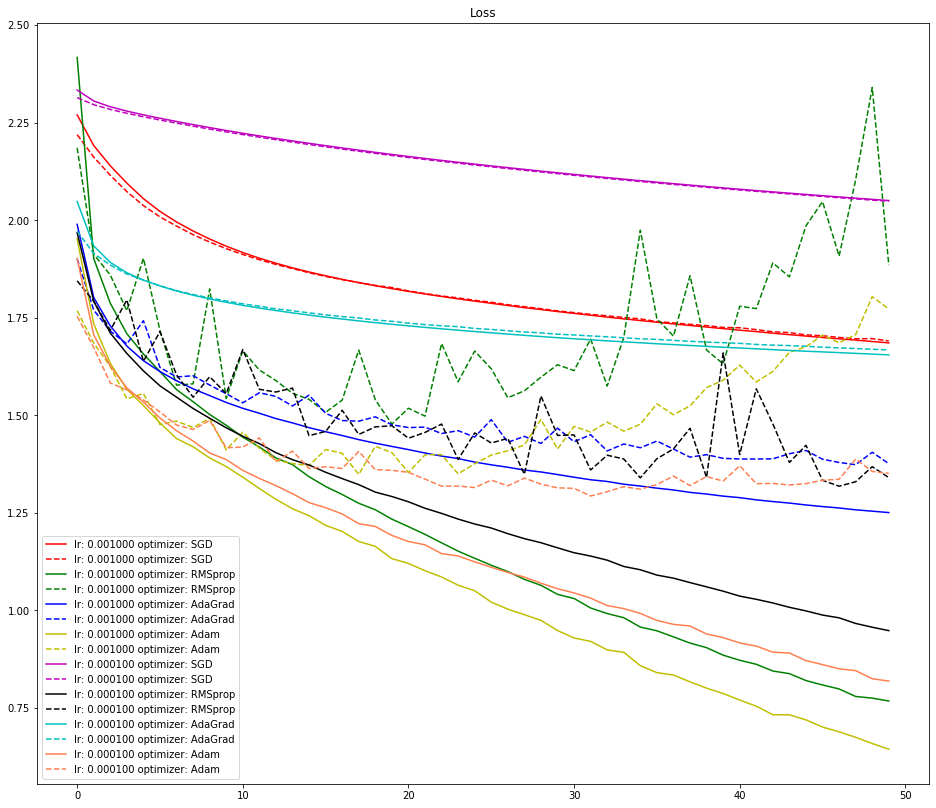

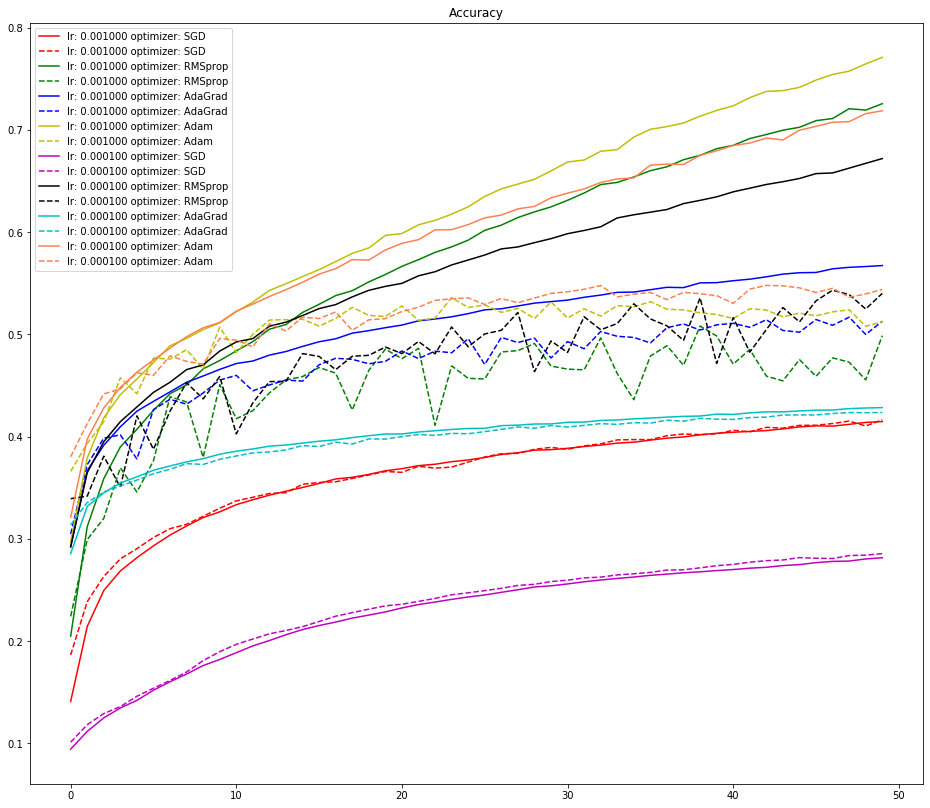

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()